In [1]:
# import libraries

import pandas as pd
import requests
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#import data set

from vega_datasets import data


In [2]:
df = data.sf_temps()

In [3]:
df.head(1)

,temp,date
0,47.8,2010-01-01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [5]:
df.columns.tolist()

['temp', 'date']

### Resample by the day and take the average temperature. Visualize the average temperature over time.


In [6]:
df = df.set_index('date').sort_index()

<AxesSubplot:xlabel='date'>

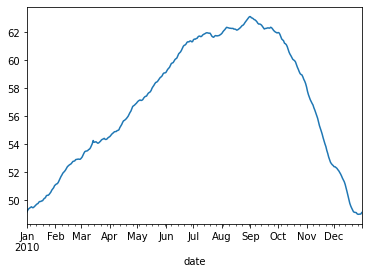

In [7]:
daily_viz = df.resample('D').mean()
daily_viz.temp.plot()

### Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

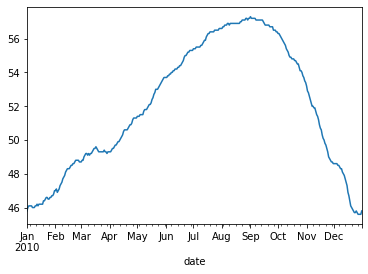

In [8]:
min_visual = df.resample('D').min()

min_visual.temp.plot()


### Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

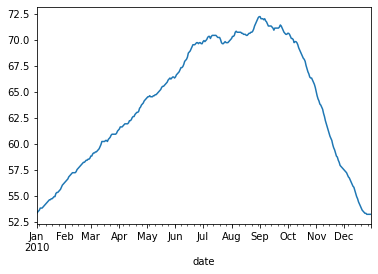

In [9]:
max_visual = df.resample('D').max()

max_visual.temp.plot()

### Which month is the coldest, on average?

In [10]:
avg_temp = df.resample('M').mean()

avg_temp.temp.nsmallest(1, keep='first')

date
2010-01-31    49.98414
Freq: M, Name: temp, dtype: float64

### Which month has the highest average temperature?

In [11]:
avg_high_temp = df.resample('M').mean().temp.nlargest(1, keep='first')

avg_high_temp

date
2010-09-30    62.487083
Freq: M, Name: temp, dtype: float64

### Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [12]:
df['max_temp'] = df.resample('D').max()
df['min_temp'] = df.temp.resample('D').min()
df['avg_temp'] = round(df.temp.resample('D').mean(), 1)

In [13]:
df = df.dropna()

In [14]:
df.drop(columns = 'temp', inplace=True)

In [15]:
df['change_in_temp'] = df.max_temp - df.min_temp

In [16]:
df.head()

,max_temp,min_temp,avg_temp,change_in_temp
date,,,,
2010-01-01,53.3,45.8,49.2,7.5
2010-01-02,53.4,46.0,49.3,7.4
2010-01-03,53.5,46.1,49.4,7.4
2010-01-04,53.6,46.1,49.4,7.5
2010-01-05,53.8,46.1,49.5,7.7


### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

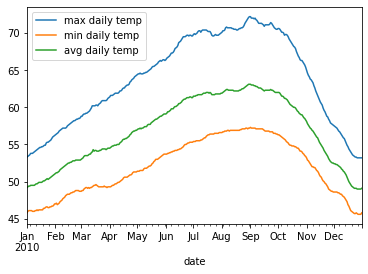

In [17]:

df.max_temp.plot(label = 'max daily temp')
df.min_temp.plot(label = 'min daily temp')
df.avg_temp.plot(label = 'avg daily temp')
plt.legend()

-----

### Which year and month combination has the highest amount of precipitation?

In [18]:
df_sea = data.seattle_weather()

In [19]:
df_sea = df_sea.set_index('date').sort_index()

In [20]:
df_sea.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [21]:
df_sea.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [22]:
df_sea.resample('M').precipitation.mean().nlargest(1, keep='first')

date
2015-12-31    9.177419
Freq: M, Name: precipitation, dtype: float64

### Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

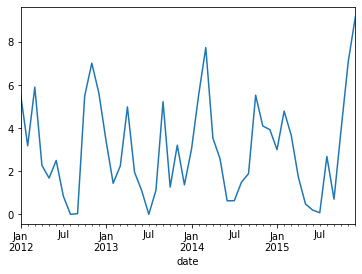

In [23]:
month_precip = df_sea.resample('M').mean()

month_precip.precipitation.plot()

### Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

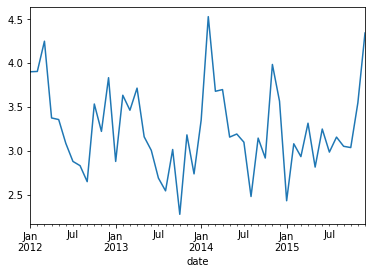

In [24]:
month_wind = df_sea.resample('M').mean()

month_wind.wind.plot()

### Which year-month combination is the windiest?

In [25]:
df_sea.resample('M').wind.mean().nlargest(1, keep='first')

date
2014-02-28    4.528571
Freq: M, Name: wind, dtype: float64

### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [26]:
df_sea['sunny_days'] = df_sea.weather.apply(lambda weather: 1 if weather == 'sun' else 0)

In [27]:
df_sea.head(1)

,precipitation,temp_max,temp_min,wind,weather,sunny_days
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,0


In [28]:
sunny_weather = df_sea.resample('A').sum()
sunny_weather.nlargest(1, 'sunny_days')

,precipitation,temp_max,temp_min,wind,sunny_days
date,,,,,
2014-12-31,1232.8,6203.5,3161.8,1236.5,211


### In which month does it rain the most?

In [29]:
df_sea['rainy_days'] = df_sea.weather.apply(lambda weather: 1 if weather == 'rain' else 0)

In [30]:
rainy_weather = df_sea.resample('A').sum()
rainy_weather.nlargest(1, 'rainy_days')

,precipitation,temp_max,temp_min,wind,sunny_days,rainy_days
date,,,,,,
2012-12-31,1226.0,5591.3,2668.0,1244.7,118,191


### Which month has the most number of days with a non-zero amount of precipitation?

In [31]:
df_sea['precip_nonzero'] = df_sea.precipitation.apply(lambda precipitation: 1 if precipitation > 0 else 0)

In [32]:
df_sea.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_days,rainy_days,precip_nonzero
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,0,0,0
2012-01-02,10.9,10.6,2.8,4.5,rain,0,1,1
2012-01-03,0.8,11.7,7.2,2.3,rain,0,1,1
2012-01-04,20.3,12.2,5.6,4.7,rain,0,1,1
2012-01-05,1.3,8.9,2.8,6.1,rain,0,1,1


In [33]:
total_precipdays = df_sea.resample('A').sum()
total_precipdays.nlargest(1, 'precip_nonzero')

,precipitation,temp_max,temp_min,wind,sunny_days,rainy_days,precip_nonzero
date,,,,,,,
2012-12-31,1226.0,5591.3,2668.0,1244.7,118,191,177


---------

### Convert any negative delays to 0.

In [34]:
df_flights = data.flights_20k()

In [36]:
df_flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [38]:
df_flights = df_flights.set_index('date').sort_index()

In [39]:
df_flights.head(1)

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW


In [40]:
df_flights.columns.to_list()

['delay', 'distance', 'origin', 'destination']

In [41]:
df_flights.delay.apply(lambda delay: 0 if delay < 0 else delay )

date
2001-01-01 00:01:00    14
2001-01-01 06:20:00     0
2001-01-01 06:30:00     0
2001-01-01 07:00:00     0
2001-01-01 07:00:00     0
                       ..
2001-03-31 21:02:00    26
2001-03-31 21:05:00     0
2001-03-31 21:05:00     0
2001-03-31 21:30:00    30
2001-03-31 21:30:00     0
Name: delay, Length: 20000, dtype: int64

### Which hour of the day has the highest average delay?

In [42]:
df_flights.resample('H').delay.mean().nlargest(1, keep='first')

date
2001-02-23 03:00:00    360.0
Name: delay, dtype: float64

### Does the day of the week make a difference in the delay amount?

In [43]:
df_flights['day'] = df_flights.index.day_name()

In [44]:
df_flights.head(1)

,delay,distance,origin,destination,day
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,Monday


In [48]:
df_flights.groupby('day').delay.mean()

day
Friday       15.594452
Monday        3.595973
Saturday      4.667520
Sunday        7.255164
Thursday     10.245766
Tuesday       6.198981
Wednesday     8.161416
Name: delay, dtype: float64

- Yes, day of the week does make a difference in delay amount. Fridays are the worst followed by Thursday. Monday sees the least delay on average

### Does the month make a difference in the delay amount?

In [49]:
df_flights['month'] = df_flights.index.month_name()

In [50]:
df_flights.head(1)

,delay,distance,origin,destination,day,month
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,Monday,January


In [52]:
df_flights.month.value_counts()

March       6960
January     6784
February    6256
Name: month, dtype: int64

In [51]:
df_flights.groupby('month').delay.mean()

month
February    9.398338
January     8.242630
March       6.804310
Name: delay, dtype: float64

- Yes, the month makes a difference in the delay amount. February sees the largest delay on average from what is seen in the data set.

----

### Bonus